## Linear Dataset (Feedforward, back propogation and multi-layer perceptron)

### Feed Forward

In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Feedforward neural network without bias
class NeuralNetworkWithoutBias:
    def __init__(self):
        self.input_size = 4
        self.hidden_size = 8
        self.output_size = 3

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

    def forward(self, X):
        # Forward pass without bias
        self.hidden_output = sigmoid(np.dot(X, self.weights_input_hidden))
        self.output = softmax(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output
    
    def get_weights(self):
        return self.weights_input_hidden, self.weights_hidden_output

# Feedforward neural network with bias
class NeuralNetworkWithBias:
    def __init__(self):
        self.input_size = 4
        self.hidden_size = 8
        self.output_size = 3

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass with bias
        self.hidden_output = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def get_weights(self):
        return self.weights_input_hidden, self.weights_hidden_output, self.bias_hidden, self.bias_output

# Instantiate models
model_without_bias = NeuralNetworkWithoutBias()
model_with_bias = NeuralNetworkWithBias()

# Define training parameters
epochs = 50
learning_rate = 0.01

# Train NeuralNetworkWithoutBias and track weights
print("Training NeuralNetworkWithoutBias...")
for epoch in range(epochs):
    output = model_without_bias.forward(X_train)
    weights_input_hidden, weights_hidden_output = model_without_bias.get_weights()
    # Update weights
    # Here you can perform gradient descent or any optimization algorithm to update weights
    # For simplicity, I'll just print weights at each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:")
        print("Weights Input Hidden:")
        print(weights_input_hidden)
        print("Weights Hidden Output:")
        print(weights_hidden_output)
        print()


Training NeuralNetworkWithoutBias...
Epoch 0:
Weights Input Hidden:
[[ 1.25089919  0.4976716   0.04295049  0.23095692  0.62960397  0.06964303
  -0.85357444  0.55269453]
 [-0.22809445  0.31419489  0.72772736  1.36922443 -0.06247171  0.64138742
   0.88333996  1.62831489]
 [-0.20030805 -0.2429956  -1.42843686 -2.18813508  0.95636274  0.53527686
   0.50768859 -0.23908866]
 [ 0.32337683  1.38748683 -1.00783672  0.81199224  1.57208725  0.9010686
   0.20298224  2.00795598]]
Weights Hidden Output:
[[-8.41671905e-01  1.26327764e+00  5.51269213e-02]
 [ 1.37256428e+00 -1.16452959e-01 -3.73658272e-01]
 [ 1.56930159e+00  9.79981539e-01  1.42084774e+00]
 [ 1.52069421e+00  2.67630135e-01  9.43429532e-01]
 [ 2.33840891e+00  3.64747883e-01  1.05115272e-01]
 [-1.27877387e+00  1.66353400e+00  2.43548380e+00]
 [ 2.78955985e-01 -2.14018032e+00  9.33185113e-01]
 [-1.10545349e+00  1.51670685e-03  9.74813050e-01]]

Epoch 10:
Weights Input Hidden:
[[ 1.25089919  0.4976716   0.04295049  0.23095692  0.62960397  

In [22]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


# Feedforward neural network without bias
class NeuralNetworkWithoutBias:
    def __init__(self):
        self.input_size = 4
        self.hidden_size = 8
        self.output_size = 3

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

    def forward(self, X):
        # Forward pass without bias
        self.hidden_output = sigmoid(np.dot(X, self.weights_input_hidden))
        self.output = softmax(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

# Feedforward neural network with bias
class NeuralNetworkWithBias:
    def __init__(self):
        self.input_size = 4
        self.hidden_size = 8
        self.output_size = 3

        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass with bias
        self.hidden_output = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output

# Instantiate models
model_without_bias = NeuralNetworkWithoutBias()
model_with_bias = NeuralNetworkWithBias()

# Forward pass without bias
y_pred_without_bias = model_without_bias.forward(X_test)

# Forward pass with bias
y_pred_with_bias = model_with_bias.forward(X_test)

# Predictions
y_pred_without_bias_class = np.argmax(y_pred_without_bias, axis=1)
y_pred_with_bias_class = np.argmax(y_pred_with_bias, axis=1)

# Evaluate accuracy
accuracy_without_bias = accuracy_score(y_test, y_pred_without_bias_class)
accuracy_with_bias = accuracy_score(y_test, y_pred_with_bias_class)


    
print("Accuracy without bias:", accuracy_without_bias)
print("Accuracy with bias:", accuracy_with_bias)

Accuracy without bias: 0.26666666666666666
Accuracy with bias: 0.43333333333333335


# Back propogation

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers


# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Back Propagation neural network for the Breast Cancer dataset
model_bp_cancer = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(30,),use_bias = True),  # Input layer with 30 features and ReLU activation
    layers.Dense(1, activation='sigmoid',use_bias = True)                    # Output layer with 1 neuron for binary classification
])

# Compile the model
model_bp_cancer.compile(optimizer='adam', 
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

# Train the model
model_bp_cancer.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Evaluating the model
test_loss, test_acc = model_bp_cancer.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6562 - loss: 0.6791

W0000 00:00:1709700856.405085     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7878 - loss: 0.5559 - val_accuracy: 0.9561 - val_loss: 0.2511
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9517 - loss: 0.2372 - val_accuracy: 0.9649 - val_loss: 0.1572
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9505 - loss: 0.1696 - val_accuracy: 0.9737 - val_loss: 0.1199
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.1380 - val_accuracy: 0.9737 - val_loss: 0.1002
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9673 - loss: 0.1215 - val_accuracy: 0.9737 - val_loss: 0.0892
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9704 - loss: 0.1043 - val_accuracy: 0.9737 - val_loss: 0.0823
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0911 - val_accuracy: 0.9737 - val_loss: 0.0778
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.1111 - val_accuracy: 0.9737 - val_loss: 0.0761
Ep

In [16]:
from tensorflow.keras.callbacks import LambdaCallback

# Custom callback to track weight updates
class WeightTrackerCallback(LambdaCallback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 1 == 0:  # Print weights every epoch
            print("Epoch:", epoch)
            for layer in model_bp_cancer.layers:
                if hasattr(layer, 'kernel'):  # Check if layer has weights
                    print("Layer:", layer.name)
                    print("Weights:", layer.get_weights()[0])
                    if layer.use_bias == True:
                        print("Bias:", layer.get_weights()[1])
                    print()

# Train the model with weight tracking callback
weight_tracker = WeightTrackerCallback()
model_bp_cancer.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test), callbacks=[weight_tracker])

# Evaluate the model
test_loss, test_acc = model_bp_cancer.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0359Epoch: 0
Layer: dense_23
Weights: [[ 0.14044817  0.17264047  0.0174218  ...  0.15523626 -0.09572692
  -0.15544488]
 [ 0.14662185  0.19767915 -0.04186318 ... -0.03778104  0.06238831
  -0.09179728]
 [-0.03982201  0.20293412 -0.15297846 ...  0.19752279  0.13925906
   0.05372299]
 ...
 [ 0.05109417  0.1982963  -0.10146073 ...  0.21659027 -0.10566116
   0.14614646]
 [ 0.1339272   0.09948426  0.06803311 ... -0.12641111  0.00936853
  -0.12061183]
 [-0.10077387  0.20433606  0.17217284 ...  0.11095747  0.04064786
  -0.13440183]]
Bias: [ 0.06190616  0.06720959 -0.0028629   0.01050855 -0.02979922 -0.0380099
 -0.02050318  0.02832904  0.00894506 -0.02305391 -0.00396915  0.03251345
  0.01720689 -0.00612398 -0.01989249  0.02996363  0.02255612  0.06978945
  0.04303657  0.07111184 -0.02240883  0.07606687  0.06316083  0.03200837
  0.0506329   0.09767446 -0.01728761  0.04705904 -0.00175166 -0.04323914
 -0.03334452 -0.0279

## Back propogation no bias

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers


# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Back Propagation neural network for the Breast Cancer dataset
model_bp_cancer = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(30,),use_bias = False),  # Input layer with 30 features and ReLU activation
    layers.Dense(1, activation='sigmoid',use_bias = False)                    # Output layer with 1 neuron for binary classification
])

# Compile the model
model_bp_cancer.compile(optimizer='adam', 
                         loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                         metrics=['accuracy'])

# Train the model
model_bp_cancer.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test),callbacks=[weight_tracker])

# Evaluating the model
test_loss, test_acc = model_bp_cancer.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 10s 782ms/step - accuracy: 0.1250 - loss: 0.9351

W0000 00:00:1709700603.642291     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4580 - loss: 0.7288  Epoch: 0
Layer: dense_12
Weights: [[-0.02322356  0.13648073  0.08199874 ...  0.19862586  0.03455294
  -0.1889467 ]
 [-0.13909543  0.05295795  0.0510171  ... -0.017204    0.14210021
  -0.20625372]
 [ 0.14953884  0.11394755 -0.01140538 ...  0.13561793 -0.12718755
   0.16293399]
 ...
 [-0.065575   -0.09281849 -0.05159059 ... -0.03697946  0.08700307
  -0.1600906 ]
 [ 0.17429632 -0.1094298   0.16843939 ...  0.1998503   0.04559278
  -0.00491192]
 [-0.00049028  0.05329657  0.06034956 ...  0.09075642 -0.10290484
   0.08714139]]

Layer: dense_13
Weights: [[ 0.01002052]
 [-0.10077387]
 [-0.00520134]
 [ 0.04647229]
 [-0.21943276]
 [ 0.11937501]
 [-0.08200347]
 [ 0.08546375]
 [-0.16210473]
 [-0.01288582]
 [-0.14311609]
 [ 0.16785705]
 [ 0.14896984]
 [ 0.12069216]
 [ 0.11206166]
 [ 0.19145842]
 [-0.04999626]
 [ 0.11583061]
 [-0.06774005]
 [ 0.14564985]
 [-0.19649923]
 [ 0.16537681]
 [ 0.19142741]
 [-0.07541592]
 [ 0.08190677

## Multi Layer Perceptron

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Build the multilayer perceptron (MLP) for the Breast Cancer dataset
model_mlp_cancer = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(30,), use_bias = False),  # Input layer with 30 features and ReLU activation
    layers.Dense(64, activation='relu',use_bias = False),                      # First hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid',use_bias = False)                     # Output layer with 1 neuron for binary classification
])

# Compile the model
model_mlp_cancer.compile(optimizer='adam', 
                          loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                          metrics=['accuracy'])

# Train the model
model_mlp_cancer.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test),callbacks=[weight_tracker])

# Evaluating the model
test_loss, test_acc = model_mlp_cancer.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Training set size: 455
Testing set size: 114
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5000 - loss: 0.7260

W0000 00:00:1709700681.290966     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7306 - loss: 0.5498Epoch: 0
Layer: dense_12
Weights: [[-0.10643061  0.16972499  0.08246028 ...  0.22985771 -0.02792773
  -0.24751393]
 [-0.22020218  0.05047872  0.05996682 ...  0.00638482  0.1069172
  -0.283392  ]
 [ 0.06725012  0.14589654 -0.0104304  ...  0.16603078 -0.18817702
   0.10579984]
 ...
 [-0.14850526 -0.05879472 -0.05318414 ... -0.00628022  0.02962225
  -0.2134177 ]
 [ 0.09745426 -0.07855334  0.15432927 ...  0.242868   -0.00161177
  -0.06030374]
 [-0.02937638  0.04081648  0.06268596 ...  0.1011193  -0.12659127
   0.04285301]]

Layer: dense_13
Weights: [[ 0.06294651]
 [-0.13987231]
 [ 0.01334353]
 [ 0.08020285]
 [-0.2831548 ]
 [ 0.15617342]
 [-0.09997097]
 [ 0.1350666 ]
 [-0.14073916]
 [-0.07327046]
 [-0.13633732]
 [ 0.22938734]
 [ 0.19761363]
 [ 0.12962592]
 [ 0.1382178 ]
 [ 0.19205728]
 [-0.07516222]
 [ 0.16604377]
 [-0.07860643]
 [ 0.1481459 ]
 [-0.1949069 ]
 [ 0.21386103]
 [ 0.22815153]
 [-0.14557682]
 [ 0.12834136]
 

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Build the multilayer perceptron (MLP) for the Breast Cancer dataset
model_mlp_cancer = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(30,),use_bias = True),  # Input layer with 30 features and ReLU activation
    layers.Dense(64, activation='relu',use_bias = True),                      # First hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid',use_bias = True)                     # Output layer with 1 neuron for binary classification
])

# Compile the model
model_mlp_cancer.compile(optimizer='adam', 
                          loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
                          metrics=['accuracy'])

# Train the model
model_mlp_cancer.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test),callbacks=[weight_tracker])

# Evaluating the model
test_loss, test_acc = model_mlp_cancer.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

Training set size: 455
Testing set size: 114
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3750 - loss: 0.7410

W0000 00:00:1709701248.930891     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7269 - loss: 0.5332Epoch: 0
Layer: dense_23
Weights: [[ 0.13925287  0.1861921   0.02395887 ...  0.15597604 -0.0936214
  -0.15141091]
 [ 0.14665101  0.18934646 -0.04769258 ... -0.02395834  0.08427881
  -0.09184928]
 [-0.04207029  0.21540083 -0.1468005  ...  0.19860071  0.1420114
   0.05774257]
 ...
 [ 0.0689408   0.21810463 -0.08561953 ...  0.22230959 -0.10629995
   0.1413316 ]
 [ 0.16767517  0.1337704   0.08954943 ... -0.11257301 -0.0013136
  -0.12552007]
 [-0.09885649  0.19330387  0.17957892 ...  0.12065341  0.04986624
  -0.1389148 ]]
Bias: [ 0.07351413  0.08505739 -0.01159423  0.01733587 -0.02356583 -0.0421124
 -0.01431711  0.02377472  0.0122135  -0.01547566  0.00803152  0.05439023
  0.03078558  0.00084965 -0.00982201  0.04361205  0.02347153  0.08900238
  0.03982439  0.09187435 -0.02907032  0.11243409  0.07767627  0.03081988
  0.05858163  0.14051485 -0.00840313  0.05246788  0.00244769 -0.04855718
 -0.0631011  -0.02542035  0.032691

## The question given asks to apply neural networks for one of the four applications. In this code snippet I will be trying out face recognition. 

## For the linear dataset i have used Olivetti dataset. A brief description of olivetti dataset is as follows:
### * Face images taken between April 1992 and April 1994.
### * There are ten different image of each of 40 distinct people
### * There are 400 face images in the dataset
### * Face images were taken at different times, variying ligthing, facial express and facial detail
### * All face images have black background
### * The images are gray level
### * Size of each image is 64x64

## For the non linear dataset i have used the fer2013 dataset. A brief description of the fer2013 dataset is as follows:

### The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

### The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

# Importing Necessary Libraries:

In [6]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces, fetch_20newsgroups_vectorized, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading Both the Datasets

In [7]:
# Load Olivetti Faces dataset
olivetti_data = fetch_olivetti_faces()
X_olivetti = olivetti_data.images
y_olivetti = olivetti_data.target

# Load FER2013 dataset (non-linear)
fer2013_data = fetch_20newsgroups_vectorized(subset='train')
X_fer2013, y_fer2013 = fer2013_data.data, fer2013_data.target

## Displaying sample images from the datasets:

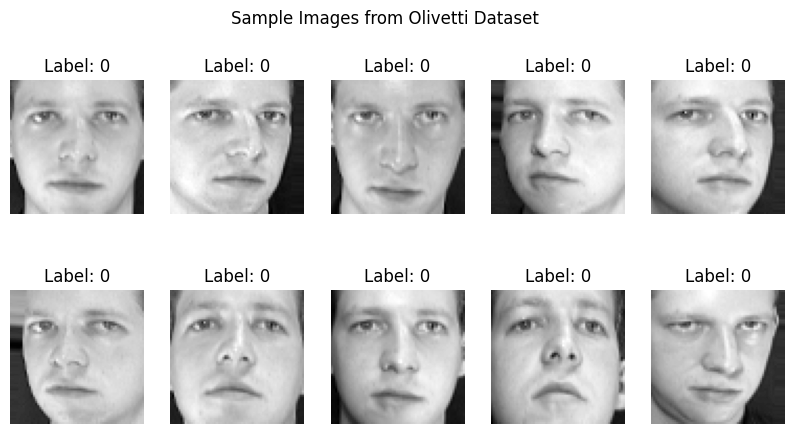

In [8]:
# Function to display sample images
def display_sample_images(images, labels, dataset_name):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from {dataset_name} Dataset")
    plt.show()

# Display sample images from the Olivetti Faces dataset
display_sample_images(X_olivetti, y_olivetti, "Olivetti")


## fer2013 dataset

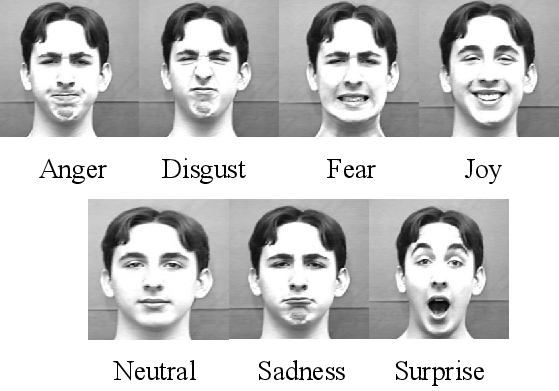

## Splitting the datasets into training and testing datasets.

In [9]:
# Split the data into training and testing sets (Olivetti Faces)
X_train_olivetti, X_test_olivetti, y_train_olivetti, y_test_olivetti = train_test_split(
    X_olivetti, y_olivetti, test_size=0.2, random_state=42)

# Split the data into training and testing sets (FER2013)
X_train_fer2013, X_test_fer2013, y_train_fer2013, y_test_fer2013 = train_test_split(
    X_fer2013, y_fer2013, test_size=0.2, random_state=42)

## Scaling the features for both datasets:

In [10]:
# Reshape input data to flatten height and width dimensions
X_train_olivetti_flat = X_train_olivetti.reshape(X_train_olivetti.shape[0], -1)
X_test_olivetti_flat = X_test_olivetti.reshape(X_test_olivetti.shape[0], -1)

X_train_fer2013_flat = X_train_fer2013.reshape(X_train_fer2013.shape[0], -1)
X_test_fer2013_flat = X_test_fer2013.reshape(X_test_fer2013.shape[0], -1)

# Scale the features (Olivetti Faces)
scaler_olivetti = StandardScaler(with_mean=False)
X_train_olivetti_scaled = scaler_olivetti.fit_transform(X_train_olivetti_flat)
X_test_olivetti_scaled = scaler_olivetti.transform(X_test_olivetti_flat)

# Scale the features (FER2013)
scaler_fer2013 = StandardScaler(with_mean=False)
X_train_fer2013_scaled = scaler_fer2013.fit_transform(X_train_fer2013_flat)
X_test_fer2013_scaled = scaler_fer2013.transform(X_test_fer2013_flat)

## Creating a function to build a model(

In [11]:
def build_model(activation):
    return MLPClassifier(hidden_layer_sizes=(100,),
                         activation=activation,
                         solver='sgd',
                         learning_rate_init=0.01,
                         max_iter=200,
                         random_state=42,
                         early_stopping=True,
                         n_iter_no_change=10)


## For Linear Dataset(Olivetti Dataset)

In [12]:
from sklearn import metrics
accuracy_table = []

## Using library MLP Classifier

In [13]:
linear_datasets = [
    (X_train_olivetti_scaled, X_test_olivetti_scaled, y_train_olivetti, y_test_olivetti, 'Linear (Olivetti Faces)'),
]

# Variables to store best accuracy and corresponding predicted labels and images
best_accuracy_linear = 0
best_predicted_labels_linear = None
best_actual_labels_linear = None
best_predicted_images_linear = None
best_actual_images_linear = None

for X_train, X_test, y_train, y_test, dataset_name in linear_datasets:
    for activation in ['identity', 'tanh', 'logistic', 'relu']:
            # Build and train the model
            model = build_model(activation)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_table.append((dataset_name, activation, accuracy))
            print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
            # Check if current model has highest accuracy for linear dataset
            if accuracy > best_accuracy_linear:
                best_accuracy_linear = accuracy
                best_predicted_labels_linear = y_pred
                best_actual_labels_linear = y_test
                best_predicted_images_linear = X_test
                best_actual_images_linear = X_test


Accuracy score:0.00
Accuracy score:0.03
Accuracy score:0.09
Accuracy score:0.00


## Back Propogation Network

In [24]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Olivetti Faces dataset
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

# Reshape the input data
X = X.reshape(-1, 64, 64)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the backpropagation neural network with tanh activation for Olivetti dataset
model_bp_tanh_olivetti = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='linear'),  # Input layer with 64x64 input shape and tanh activation
                                                
    layers.Dense(40, activation='linear')                           # Output layer with 40 neurons for 40 classes (for Olivetti faces)
])

# Compile the model with appropriate loss function and optimizer
model_bp_tanh_olivetti.compile(optimizer='sgd',                    # Stochastic Gradient Descent optimizer
                               loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
                               metrics=['accuracy'])

# Train the model using backpropagation
model_bp_tanh_olivetti.fit(X_train, y_train, epochs=100, batch_size=54)

# Evaluate the model
test_loss, test_acc = model_bp_tanh_olivetti.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Making predictions on the test set
y_pred = model_bp_tanh_olivetti.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1)

# Metrics calculation
mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 888ms/step - accuracy: 0.0185 - loss: 8.6445

W0000 00:00:1709701276.559871     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0207 - loss: 10.6163
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0228 - loss: 11.0625 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0145 - loss: 11.4314     
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0162 - loss: 8.7801     
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0251 - loss: 9.2787  
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0216 - loss: 8.9256     
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0147 - loss: 9.2737     
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0281 - loss: 9.0284 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0331 - loss: 8.7370 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0330 - loss: 8.8261 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0221 - loss: 9.2626  
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [26]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Olivetti Faces dataset
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

# Reshape the input data
X = X.reshape(-1, 64, 64)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the backpropagation neural network with tanh activation for Olivetti dataset
model_bp_tanh_olivetti = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='relu'),  # Input layer with 64x64 input shape and tanh activation
                                                
    layers.Dense(40, activation='relu')                           # Output layer with 40 neurons for 40 classes (for Olivetti faces)
])

# Compile the model with appropriate loss function and optimizer
model_bp_tanh_olivetti.compile(optimizer='sgd',                    # Stochastic Gradient Descent optimizer
                               loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
                               metrics=['accuracy'])

# Train the model using backpropagation
model_bp_tanh_olivetti.fit(X_train, y_train, epochs=100, batch_size=54)

# Evaluate the model
test_loss, test_acc = model_bp_tanh_olivetti.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Making predictions on the test set
y_pred = model_bp_tanh_olivetti.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1)

# Metrics calculation
mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - accuracy: 0.0370 - loss: 9.4989

W0000 00:00:1709701305.838410     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0270 - loss: 10.3475
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0324 - loss: 9.9126 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0246 - loss: 10.5148 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0253 - loss: 10.6257 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0183 - loss: 11.0894     
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0318 - loss: 9.1555 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0276 - loss: 9.3551 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0379 - loss: 9.3299 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0284 - loss: 9.7867 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0182 - loss: 8.9736     
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0232 - loss: 9.3483 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0314 - los

In [27]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Olivetti Faces dataset
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

# Reshape the input data
X = X.reshape(-1, 64, 64)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the backpropagation neural network with tanh activation for Olivetti dataset
model_bp_tanh_olivetti = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='sigmoid'),  # Input layer with 64x64 input shape and tanh activation
                                                
    layers.Dense(40, activation='sigmoid')                           # Output layer with 40 neurons for 40 classes (for Olivetti faces)
])

# Compile the model with appropriate loss function and optimizer
model_bp_tanh_olivetti.compile(optimizer='sgd',                    # Stochastic Gradient Descent optimizer
                               loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
                               metrics=['accuracy'])

# Train the model using backpropagation
model_bp_tanh_olivetti.fit(X_train, y_train, epochs=100, batch_size=54)

# Evaluate the model
test_loss, test_acc = model_bp_tanh_olivetti.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Making predictions on the test set
y_pred = model_bp_tanh_olivetti.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1)

# Metrics calculation
mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - accuracy: 0.0000e+00 - loss: 3.8639

W0000 00:00:1709701319.671464     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0299 - loss: 3.8981    
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0390 - loss: 3.7812 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0269 - loss: 3.7782 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0280 - loss: 3.7200     
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0263 - loss: 3.7074 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0436 - loss: 3.6823 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0528 - loss: 3.6545 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0868 - loss: 3.6506 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0769 - loss: 3.6630 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0755 - loss: 3.6539 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0892 - loss: 3.6398 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0983 - loss: 3

In [28]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Olivetti Faces dataset
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

# Reshape the input data
X = X.reshape(-1, 64, 64)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the backpropagation neural network with tanh activation for Olivetti dataset
model_bp_tanh_olivetti = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='tanh'),  # Input layer with 64x64 input shape and tanh activation
                                                
    layers.Dense(40, activation='tanh')                           # Output layer with 40 neurons for 40 classes (for Olivetti faces)
])

# Compile the model with appropriate loss function and optimizer
model_bp_tanh_olivetti.compile(optimizer='sgd',                    # Stochastic Gradient Descent optimizer
                               loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
                               metrics=['accuracy'])

# Train the model using backpropagation
model_bp_tanh_olivetti.fit(X_train, y_train, epochs=100, batch_size=54)

# Evaluate the model
test_loss, test_acc = model_bp_tanh_olivetti.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Making predictions on the test set
y_pred = model_bp_tanh_olivetti.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1)

# Metrics calculation
mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 772ms/step - accuracy: 0.0185 - loss: 12.4750

W0000 00:00:1709701334.422593     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.0231 - loss: 12.5031
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0227 - loss: 12.7547     
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0263 - loss: 11.3826 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0249 - loss: 11.7307 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0227 - loss: 12.3713     
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0331 - loss: 11.8376 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0302 - loss: 10.9701 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0246 - loss: 11.3894 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0282 - loss: 11.2726 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0300 - loss: 11.2769 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0245 - loss: 10.4974     
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

## Multilayer Perceptron

In [30]:
# Building the multilayer perceptron (MLP) with tanh activation
model_mlp_tanh = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='linear'),      
    layers.Dense(64, activation='linear'),       
    layers.Dense(40, activation='linear')        
])
# Compiling the model with appropriate loss function and optimizer
model_mlp_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# Training the MLP model
model_mlp_tanh.fit(X_train, y_train, epochs=100, batch_size=32)
# Evaluating the model
test_loss, test_acc = model_mlp_tanh.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model_mlp_tanh.predict(X_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0241 - loss: 12.8858
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0430 - loss: 14.1514 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0183 - loss: 13.8620     
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0324 - loss: 12.2430 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0195 - loss: 12.1293     
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0219 - loss: 12.6431 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0223 - loss: 12.3148     
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0284 - loss: 12.8662 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0164 - loss: 12.9883     
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0458 - loss: 12.4047 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0243 - loss: 12.3132     
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━

In [31]:
# Building the multilayer perceptron (MLP) with tanh activation
model_mlp_tanh = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='linear',use_bias = False),      
    layers.Dense(64, activation='linear',use_bias = False),       
    layers.Dense(40, activation='linear')        
])
# Compiling the model with appropriate loss function and optimizer
model_mlp_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# Training the MLP model
model_mlp_tanh.fit(X_train, y_train, epochs=100, batch_size=32)
# Evaluating the model
test_loss, test_acc = model_mlp_tanh.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model_mlp_tanh.predict(X_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0185 - loss: 12.3643
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0408 - loss: 11.1770
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0265 - loss: 11.8669 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0290 - loss: 12.4653     
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0185 - loss: 12.7401 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0208 - loss: 12.5876     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0250 - loss: 12.2053     
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0180 - loss: 12.1015     
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0295 - loss: 12.3936 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0244 - loss: 12.3654 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0166 - loss: 12.4393     
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━

In [32]:
# Building the multilayer perceptron (MLP) with tanh activation
model_mlp_tanh = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='sigmoid'),      
    layers.Dense(64, activation='sigmoid'),       
    layers.Dense(40, activation='sigmoid')        
])
# Compiling the model with appropriate loss function and optimizer
model_mlp_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# Training the MLP model
model_mlp_tanh.fit(X_train, y_train, epochs=100, batch_size=32)
# Evaluating the model
test_loss, test_acc = model_mlp_tanh.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model_mlp_tanh.predict(X_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0105 - loss: 3.8251    
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0109 - loss: 3.7491     
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0182 - loss: 3.6949     
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0290 - loss: 3.6814     
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0272 - loss: 3.6668     
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0316 - loss: 3.6656     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0523 - loss: 3.6467 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0627 - loss: 3.6353 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0551 - loss: 3.6292 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0637 - loss: 3.6235     
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0994 - loss: 3.6302 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━

In [33]:
# Building the multilayer perceptron (MLP) with tanh activation
model_mlp_tanh = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='tanh'),      
    layers.Dense(64, activation='tanh'),       
    layers.Dense(40, activation='tanh')        
])
# Compiling the model with appropriate loss function and optimizer
model_mlp_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# Training the MLP model
model_mlp_tanh.fit(X_train, y_train, epochs=100, batch_size=32)
# Evaluating the model
test_loss, test_acc = model_mlp_tanh.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model_mlp_tanh.predict(X_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0245 - loss: 10.4856
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0290 - loss: 9.9350  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0339 - loss: 9.7062 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0276 - loss: 9.9261 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0343 - loss: 9.9989  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0213 - loss: 10.2170     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0265 - loss: 10.9136     
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0262 - loss: 10.3671     
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0381 - loss: 10.1002 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0339 - loss: 9.8973 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0336 - loss: 10.5114 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [34]:
# Building the multilayer perceptron (MLP) with tanh activation
model_mlp_tanh = models.Sequential([
    layers.Flatten(input_shape=(64, 64)),  
    layers.Dense(128, activation='relu'),      
    layers.Dense(64, activation='relu'),       
    layers.Dense(40, activation='relu')        
])
# Compiling the model with appropriate loss function and optimizer
model_mlp_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# Training the MLP model
model_mlp_tanh.fit(X_train, y_train, epochs=100, batch_size=32)
# Evaluating the model
test_loss, test_acc = model_mlp_tanh.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model_mlp_tanh.predict(X_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

mae = mean_absolute_error(y_test, y_pred_labels)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred_labels)
print(f'Mean Square Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred_labels)
print(f'R Squared Error: {r2}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0179 - loss: 13.0276    
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0233 - loss: 11.9566 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0329 - loss: 12.0024 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0218 - loss: 12.1231     
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0283 - loss: 12.0396 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0157 - loss: 11.5453     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0220 - loss: 11.9125 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0239 - loss: 10.8619
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0231 - loss: 11.9725     
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0181 - loss: 12.3485     
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0248 - loss: 11.1974 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-02-29 19:52:26.581366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 19:52:26.581477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 19:52:26.728169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
train_dir = "/kaggle/input/fer2013/train" # Directory containing the training data
test_dir = "/kaggle/input/fer2013/test"  # Directory containing the validation data

## Lets us try for the non linear dataset first

## Doing data augmentation for all the images.

In [13]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## Importing required libraries

In [15]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50V2
import tensorflow as tf 

## Creating own convolution neural network model

In [16]:
# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Training the model:

In [17]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/15


2024-02-29 19:52:56.803545: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 212: 1.34155, expected 1.10543
2024-02-29 19:52:56.803595: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 234: 1.33744, expected 1.10131
2024-02-29 19:52:56.803604: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 258: 1.14316, expected 0.90703
2024-02-29 19:52:56.803613: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 281: 1.07091, expected 0.834784
2024-02-29 19:52:56.803622: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 612: 1.33348, expected 1.09735
2024-02-29 19:52:56.803630: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 711: 1.21391, expected 0.977783
2024-02-29 19:52:56.803638: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 764: 1.17617, expected 0.940043
2024-02-29 19:52:56.803646: E external

  1/359 ━━━━━━━━━━━━━━━━━━━━ 1:45:41 18s/step - accuracy: 0.1094 - loss: 3.4188

I0000 00:00:1709236384.684150     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


207/359 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.1624 - loss: 3.0287

2024-02-29 19:53:53.739503: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.98617, expected 2.52137
2024-02-29 19:53:53.739565: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.93691, expected 2.47211
2024-02-29 19:53:53.739575: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.08293, expected 2.61813
2024-02-29 19:53:53.739582: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.24781, expected 2.78301
2024-02-29 19:53:53.739590: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.46031, expected 1.99551
2024-02-29 19:53:53.739598: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 2.38553, expected 1.92073
2024-02-29 19:53:53.739605: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 2.31892, expected 1.85412
2024-02-29 19:53:53.739612: E external/local_xla/xla/se

356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.1683 - loss: 2.9465

2024-02-29 19:54:40.065855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 764: 1.02572, expected 0.811342
2024-02-29 19:54:40.065902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 811: 1.06854, expected 0.85416
2024-02-29 19:54:40.065918: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 812: 1.14172, expected 0.927341
2024-02-29 19:54:40.065935: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 909: 1.06408, expected 0.849701
2024-02-29 19:54:40.065950: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1071: 1.07706, expected 0.862683
2024-02-29 19:54:40.065961: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1091: 1.07289, expected 0.858514
2024-02-29 19:54:40.065974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1324: 0.923292, expected 0.708914
2024-02-29 19:54:40.065986: E e


Epoch 1: val_accuracy improved from -inf to 0.18087, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 114s 270ms/step - accuracy: 0.1684 - loss: 2.9445 - val_accuracy: 0.1809 - val_loss: 1.9970
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.18087
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2119 - loss: 2.4911
Epoch 3: val_accuracy improved from 0.18087 to 0.29050, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.2120 - loss: 2.4903 - val_accuracy: 0.2905 - val_loss: 1.8480
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.29050
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2514 - loss: 2.2539
Epoch 5: val_acc

### relu:44.76%

In [19]:
# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='tanh'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='tanh'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='tanh'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model2.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/15


2024-02-29 19:58:19.785453: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 212: 1.34155, expected 1.10543
2024-02-29 19:58:19.785513: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 234: 1.33744, expected 1.10131
2024-02-29 19:58:19.785529: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 258: 1.14316, expected 0.90703
2024-02-29 19:58:19.785547: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 281: 1.07091, expected 0.834784
2024-02-29 19:58:19.785562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 612: 1.33348, expected 1.09735
2024-02-29 19:58:19.785574: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 711: 1.21391, expected 0.977783
2024-02-29 19:58:19.785585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 764: 1.17617, expected 0.940043
2024-02-29 19:58:19.785596: E external

 79/359 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.1373 - loss: 3.2319

2024-02-29 19:58:35.558944: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.98617, expected 2.52137
2024-02-29 19:58:35.559000: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.93691, expected 2.47211
2024-02-29 19:58:35.559016: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.08293, expected 2.61813
2024-02-29 19:58:35.559034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.24781, expected 2.78301
2024-02-29 19:58:35.559045: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.46031, expected 1.99551
2024-02-29 19:58:35.559055: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 2.38553, expected 1.92073
2024-02-29 19:58:35.559066: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 2.31892, expected 1.85412
2024-02-29 19:58:35.559077: E external/local_xla/xla/se

356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1584 - loss: 3.0170

2024-02-29 19:59:05.075387: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 764: 1.02572, expected 0.811342
2024-02-29 19:59:05.075442: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 811: 1.06854, expected 0.85416
2024-02-29 19:59:05.075457: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 812: 1.14172, expected 0.927341
2024-02-29 19:59:05.075477: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 909: 1.06408, expected 0.849701
2024-02-29 19:59:05.075489: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1071: 1.07706, expected 0.862683
2024-02-29 19:59:05.075500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1091: 1.07289, expected 0.858514
2024-02-29 19:59:05.075512: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1324: 0.923292, expected 0.708914
2024-02-29 19:59:05.075523: E e


Epoch 1: val_accuracy improved from -inf to 0.24092, saving model to model2.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 113ms/step - accuracy: 0.1586 - loss: 3.0147 - val_accuracy: 0.2409 - val_loss: 1.9273
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.24092
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1914 - loss: 2.5203
Epoch 3: val_accuracy improved from 0.24092 to 0.31285, saving model to model2.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.1915 - loss: 2.5197 - val_accuracy: 0.3128 - val_loss: 1.8334
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.31285
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2140 - loss: 2.3468
Epoch 5: val_ac

### tanh:37.5%

In [21]:
# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='sigmoid'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='sigmoid'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='sigmoid'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='sigmoid'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model3.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.1669 - loss: 2.8870
Epoch 1: val_accuracy improved from -inf to 0.24721, saving model to model3.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.1670 - loss: 2.8848 - val_accuracy: 0.2472 - val_loss: 1.9845
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.24721
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2079 - loss: 2.4232
Epoch 3: val_accuracy improved from 0.24721 to 0.33939, saving model to model3.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.2080 - loss: 2.4226 - val_accuracy: 0.3394 - val_loss: 1.7673
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.33939
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
356/

### sigmoid: 42.45%